In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


ресерч на сиам

СТАТЬЯ ПО ДЕТЕКЦИИ АНОМАЛИЙ ВО ВРЕМЕННЫХ РЯДАХ
http://www.machinelearning.ru/wiki/images/6/6e/2018_617_RomanovNA.pdf

СТАТЬЯ ПО БИНАРНОЙ КЛАССИФИКАЦИИ СКВАЖИН  (ТОМСКИЙ УНИК)

https://vital.lib.tsu.ru/vital/access/services/Download/koha%3A000902198/SOURCE1

решение кейса по детекции аномалий во временных рядах

https://github.com/de81k/DS.MISIS.HACK-2.0/blob/main/case_2/case_2.ipynb

байесовсий классификатор

https://habr.com/ru/articles/802435/

Ресерч:

1. **ML-модели VS осложнения при бурении нефтяных скважин**

 https://habr.com/ru/companies/zyfra/articles/663242/

2. **Предсказание выбытия насосов**

 https://habr.com/ru/articles/827242/

3. **Как мы предсказывали поломки нефтяных насосов: когда big data – это в прямом смысле нефть**

 https://habr.com/ru/articles/658597/

4. **Аномалии нефтяной скважины**

 https://www.svoboda.org/a/2104344.html

Ресерч сайта SIAMOIL:

1. **ГДИС для построения, мониторинга гидродинамической модели, анализа и регулирования разработки.**
 https://www.siamoil.ru/reports/2006/33.pdf

2. **Внедрение дистанционного глубинного комплекса для исследований нижнего подпакерного объекта разработки на скважинах, оборудованных установками для одновременно раздельной эксплуатации.**
 https://www.siamoil.ru/reports/2007/4.pdf

3. **Анализ эффективности системы разработки на основе модели линий тока.**

 https://www.siamoil.ru/reports/2005/25.pdf

4. **Анализ работы систем непрерывного геофизического контроля в процессе добычи нефти.**
 https://www.siamoil.ru/reports/2014/31.pdf

4. **Алгоритмы и программы идентификации ГДИС на основе метода интегрированных моделей с учетом априорной информации**

 https://www.siamoil.ru/reports/2004/15.pdf

5. **Автоматизация сбора и обработки данных ГДИС и ТМС на нефтедобывающем предприятии.**

 https://www.siamoil.ru/reports/2013/21.pdf

6. **Cовершенствование методов гидродинамических исследований скважин, работающих при давлении ниже давления насыщения.**

 https://www.siamoil.ru/reports/2013/11.pdf

8. **Как классифицировать данные без разметки**

 https://habr.com/ru/companies/funcorp/articles/576658/

выводил временной ряд ради интереса

1. Если задача сводится к поиску аномалий, то решение можно строить на автоенкодерах. Затем нужно решать задачу классификации аномалий на полезные и бесполезные (бустим RF)
2. Если же задачей является классифицировать данные на полезные/бесполезные. Скорее всего тоже бустим RF, но тогла не понятно, что есть полезные данные, а что бесполезные, и что из них случайность, а что действительная аномалия

сверточный автоенкодер (учитывает корреляции нескольких датчиков)

isolation forest

почитать как работать с дизбалансов классов в классификаторе

сверточный автоэкодер

https://github.com/ninfueng/convolutional-autoencoder-for-anomaly-detection


isolation forest

https://www.kaggle.com/code/adithya44/anomaly-detection-isolation-forest-visualization

автоэнкодер

https://habr.com/ru/articles/491552/

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import os
from sklearn.preprocessing import StandardScaler

In [ ]:
data_marked = pd.read_csv('/content/drive/MyDrive/SIAM DATA /markup.csv', sep = ';', header=None, names=['file', 'mark', 'recovery', 'drop'] )


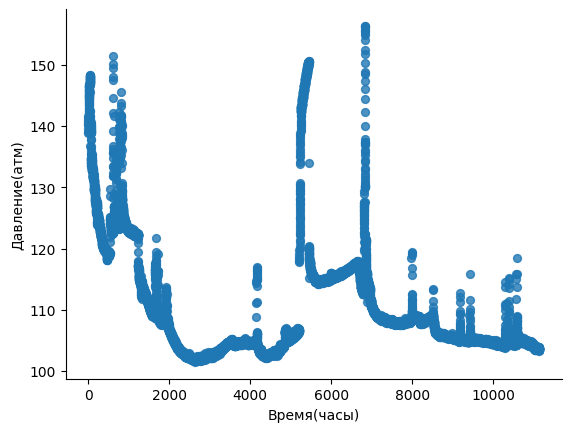

In [ ]:
df.plot(kind='scatter', x='Время(часы)', y='Давление(атм)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

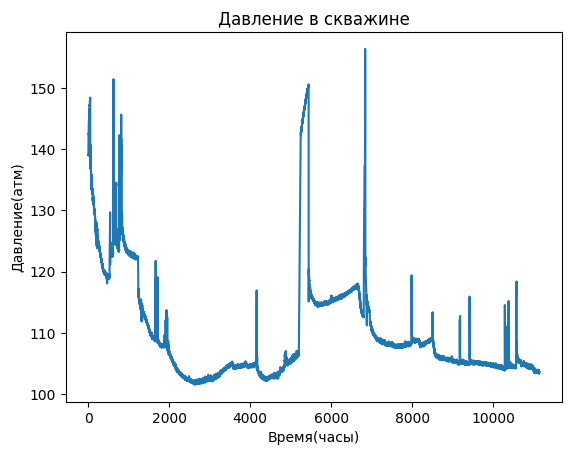

In [ ]:
plt.plot(df['Время(часы)'], df['Давление(атм)'])
plt.title('Давление в скважине')
plt.xlabel('Время(часы)')
plt.ylabel('Давление(атм)')
plt.show()

In [ ]:
data.iloc[:,1:2]

,Давление(атм)
0,70.296339
1,70.296339
2,70.296339
3,70.296339
4,70.296339
...,...
33814,61.585769
33815,61.585769
33816,61.585769
33817,61.585769


In [ ]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import numpy as np

data = pd.read_csv('/content/drive/MyDrive/SIAM DATA /test/test/088b59d5-d011-47ca-8738-f46683596220', sep = '\t', header=None, names=['Время(часы)', 'Давление(атм)'] )
data.head()

,Время(часы),Давление(атм)
0,0.000000,48.018189
1,0.152778,49.218309
2,0.459167,50.921705
3,0.623611,51.676619
4,0.918333,52.915453


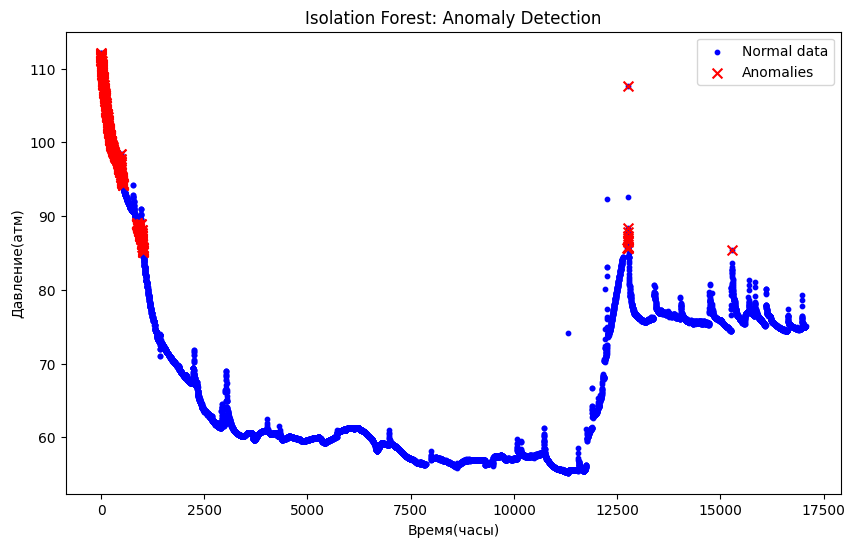

Number of anomalies detected: 639


,Время(часы),Давление(атм),anomaly,anomaly_score
0,0.000000,112.151212,-1,-0.147901
1,0.097222,112.151212,-1,-0.147901
2,1.566944,111.986679,-1,-0.147901
3,1.669722,111.986679,-1,-0.147901
4,3.059167,111.822147,-1,-0.147382


In [ ]:
import matplotlib.pyplot as plt

# Extract features
X = data[['Давление(атм)']].values

# Initialize and fit the Isolation Forest model
model = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
model.fit(X)

# Predict anomalies: -1 for outliers, 1 for inliers
data['anomaly'] = model.predict(X)
data['anomaly_score'] = model.decision_function(X)

# Extract anomalies
anomalies = data[data['anomaly'] == -1]

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(data['Время(часы)'], data['Давление(атм)'], c='blue', s=10, label='Normal data')
plt.scatter(anomalies['Время(часы)'], anomalies['Давление(атм)'], c='red', s=50, marker='x', label='Anomalies')
plt.title('Isolation Forest: Anomaly Detection')
plt.xlabel('Время(часы)')
plt.ylabel('Давление(атм)')
plt.legend()
plt.show()

# Print number of anomalies detected
print(f"Number of anomalies detected: {anomalies.shape[0]}")
anomalies.head()

In [ ]:
from sklearn.ensemble import IsolationForest
clf=IsolationForest(n_estimators=50, max_samples='auto', \
                        max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)
clf.fit(data.iloc[:,1:2])

IsolationForest(n_estimators=50, n_jobs=-1, random_state=42)

In [ ]:
pred = clf.predict(data.iloc[:,1:2])
data['anomaly']=pred
outliers=data.loc[data['anomaly']==-1]
outlier_index=list(outliers.index)
#print(outlier_index)
#Find the number of anomalies and normal points here points classified -1 are anomalous
print(data['anomaly'].value_counts())

anomaly
 1    8710
-1    4081
Name: count, dtype: int64


In [ ]:
data

,Время(часы),Давление(атм),anomaly,anomaly_score
0,0.000000,112.151212,-1,-0.147901
1,0.097222,112.151212,-1,-0.147901
2,1.566944,111.986679,-1,-0.147901
3,1.669722,111.986679,-1,-0.147901
4,3.059167,111.822147,-1,-0.147382
...,...,...,...,...
12786,17056.798056,75.073310,1,0.179400
12787,17058.142222,75.005562,1,0.176859
12788,17059.500556,74.966848,1,0.178380
12789,17060.903889,74.947491,1,0.180303


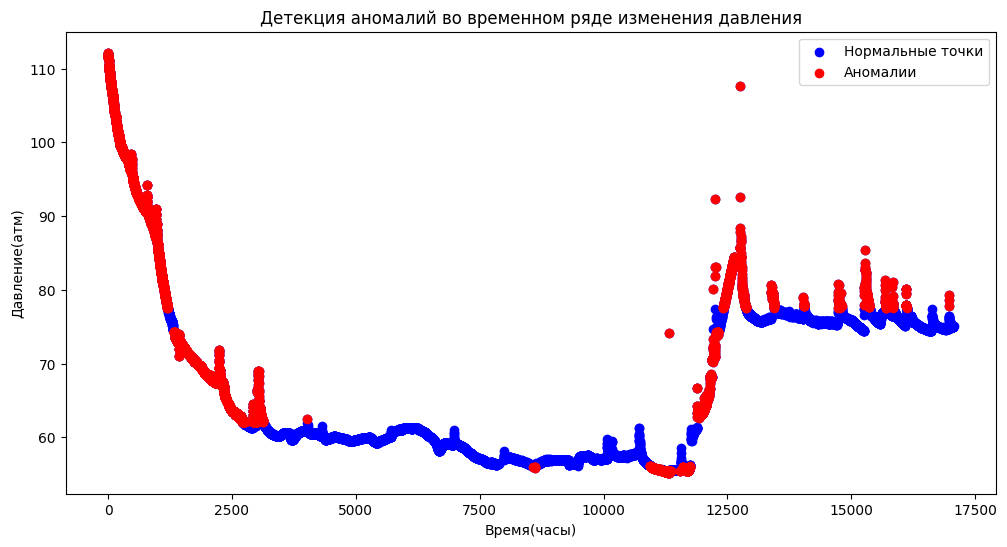

In [ ]:
# Построение графика
plt.figure(figsize=(12, 6))

# Построение нормальных точек
plt.scatter(data['Время(часы)'], data['Давление(атм)'], c='blue', label='Нормальные точки')

# Построение аномалий
plt.scatter(data.loc[data['anomaly'] == -1, 'Время(часы)'],
            data.loc[data['anomaly'] == -1, 'Давление(атм)'],
            c='red', label='Аномалии')

plt.xlabel('Время(часы)')
plt.ylabel('Давление(атм)')
plt.title('Детекция аномалий во временном ряде изменения давления')
plt.legend()
plt.show()

In [ ]:
data_2 = pd.read_csv('/content/drive/MyDrive/SIAM DATA /Task 21/Task 21/086fcb9b-8640-470c-b35d-b171e870b0ec', sep = '\t', header=None, names=['Время(часы)', 'Давление(атм)'] )

In [ ]:
from sklearn.ensemble import IsolationForest
clf=IsolationForest(n_estimators=50, max_samples='auto', \
                        max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)
clf.fit(data_2.iloc[:,1:2])

IsolationForest(n_estimators=50, n_jobs=-1, random_state=42)

In [ ]:
pred = clf.predict(data_2.iloc[:,1:2])
data_2['anomaly']=pred
outliers=data_2.loc[data_2['anomaly']==-1]
outlier_index=list(outliers.index)
#print(outlier_index)
#Find the number of anomalies and normal points here points classified -1 are anomalous
print(data_2['anomaly'].value_counts())

anomaly
 1    44035
-1     6989
Name: count, dtype: int64


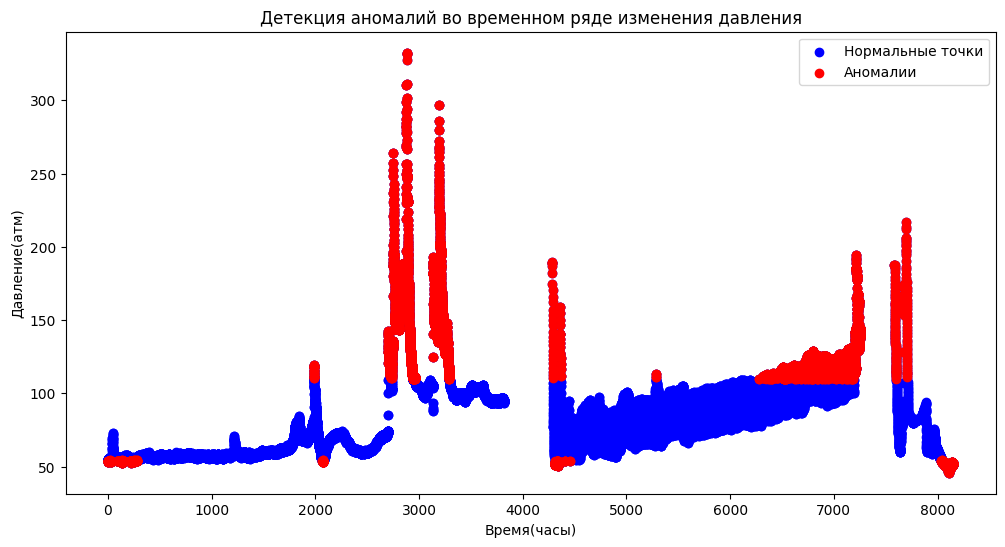

In [ ]:
# Построение графика
plt.figure(figsize=(12, 6))

# Построение нормальных точек
plt.scatter(data_2['Время(часы)'], data_2['Давление(атм)'], c='blue', label='Нормальные точки')

# Построение аномалий
plt.scatter(data_2.loc[data_2['anomaly'] == -1, 'Время(часы)'],
            data_2.loc[data_2['anomaly'] == -1, 'Давление(атм)'],
            c='red', label='Аномалии')

plt.xlabel('Время(часы)')
plt.ylabel('Давление(атм)')
plt.title('Детекция аномалий во временном ряде изменения давления')
plt.legend()
plt.show()

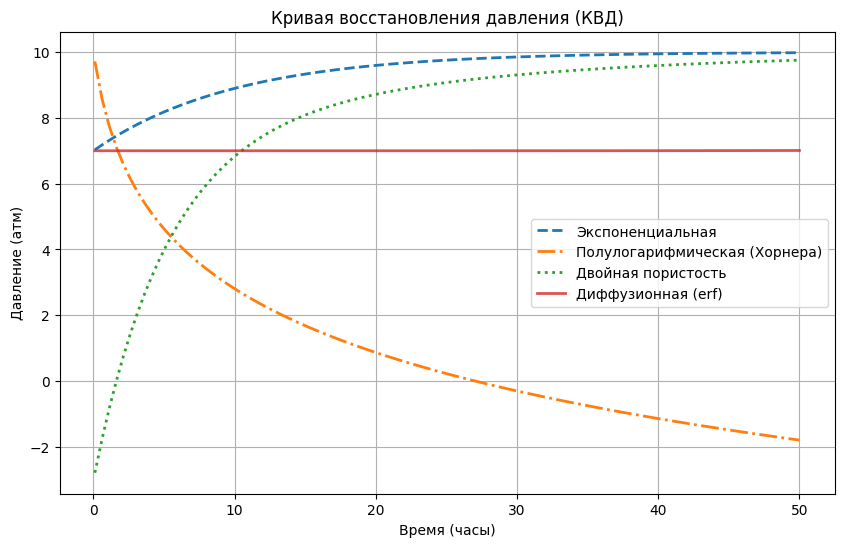

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf

# Генерация искусственных данных КВД
t = np.linspace(0.1, 50, 100)  # Время (часы)
p_e = 10  # Пластовое давление (атм)
A, B = 3, 0.1  # Коэффициенты для экспоненциальной модели
A1, B1, A2, B2 = 10, 0.2, 3, 0.05  # Двойная экспонента
C = 15  # Коэффициент для erf-модели

# Различные модели восстановления давления
p_exp = p_e - A * np.exp(-B * t)  # Экспоненциальная модель
p_horner = p_e - A * np.log(1 + t / 1)  # Модель Хорнера
p_double_exp = p_e - (A1 * np.exp(-B1 * t) + A2 * np.exp(-B2 * t))  # Двойная пористость
p_erf = p_e - A * erf(C / np.sqrt(t))  # Диффузионная модель (функция ошибок)

# Визуализация
plt.figure(figsize=(10, 6))
plt.plot(t, p_exp, label="Экспоненциальная", linestyle="--", linewidth=2)
plt.plot(t, p_horner, label="Полулогарифмическая (Хорнера)", linestyle="-.", linewidth=2)
plt.plot(t, p_double_exp, label="Двойная пористость", linestyle=":", linewidth=2)
plt.plot(t, p_erf, label="Диффузионная (erf)", linestyle="-", linewidth=2, alpha=0.8)

# Оформление графика
plt.xlabel("Время (часы)")
plt.ylabel("Давление (атм)")
plt.title("Кривая восстановления давления (КВД)")
plt.legend()
plt.grid(True)
plt.show()


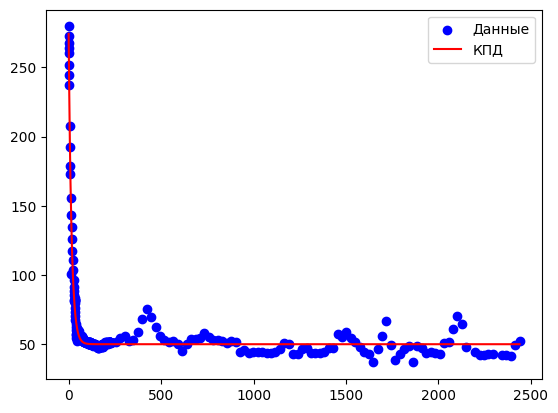

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Функция экспоненциального восстановления давления
def exp_model(t, P_e, A, B):
    return P_e - A * np.exp(-B * t)

# Загружаем данные (замени на свои)
df = pd.read_csv("/content/drive/MyDrive/SIAM DATA /Task 21/Task 21/00f035b7-ad7a-4f30-9081-522a3c10805b", sep = '\t', header=None, names=['Время(часы)', 'Давление(атм)'])
t = df["Время(часы)"].values
P = df["Давление(атм)"].values

# Аппроксимация
params, covariance = curve_fit(exp_model, t, P, p0=[P[-1], P[0]-P[-1], 0.01])
P_e, A, B = params

# Визуализация
plt.scatter(t, P, label="Данные", color='blue')
plt.plot(t, exp_model(t, P_e, A, B), label=f"КПД", color='red')
plt.legend()
plt.show()


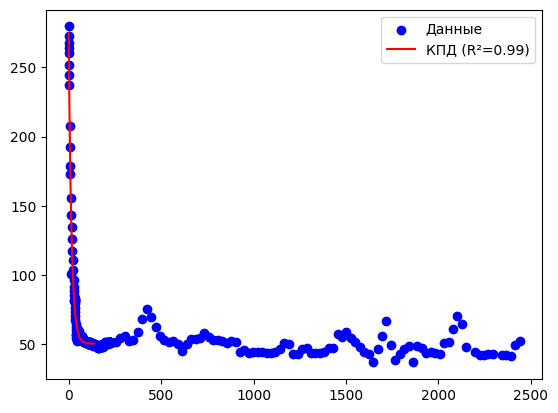

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

# Функция экспоненциального восстановления давления
def exp_model(t, P_e, A, B):
    return P_e - A * np.exp(-B * t)

# Загружаем данные (замени на свои)
df = pd.read_csv("/content/drive/MyDrive/SIAM DATA /Task 21/Task 21/00f035b7-ad7a-4f30-9081-522a3c10805b", sep = '\t', header=None, names=['Время(часы)', 'Давление(атм)'])
t = df["Время(часы)"].values
P = df["Давление(атм)"].values

# Функция для аппроксимации сегмента
def fit_segment(t_segment, P_segment):
    try:
        # Увеличиваем maxfev и настраиваем начальные параметры
        params, _ = curve_fit(exp_model, t_segment, P_segment, p0=[P_segment[-1], P_segment[0]-P_segment[-1], 0.1], maxfev=5000)
        P_e, A, B = params
        P_fit = exp_model(t_segment, P_e, A, B)
        r2 = r2_score(P_segment, P_fit)
        return P_fit, r2
    except RuntimeError:
        return None, -np.inf

# Разделение данных на сегменты и аппроксимация
segment_length = 200  # Длина сегмента
best_r2 = -np.inf
best_segment = None

for i in range(0, len(t) - segment_length):
    t_segment = t[i:i+segment_length]
    P_segment = P[i:i+segment_length]
    P_fit, r2 = fit_segment(t_segment, P_segment)

    if r2 > best_r2:
        best_r2 = r2
        best_segment = (t_segment, P_segment, P_fit)

# Визуализация
plt.scatter(t, P, label="Данные", color='blue')
if best_segment:
    t_segment, P_segment, P_fit = best_segment
    plt.plot(t_segment, P_fit, label=f"КПД (R²={best_r2:.2f})", color='red')
plt.legend()
plt.show()

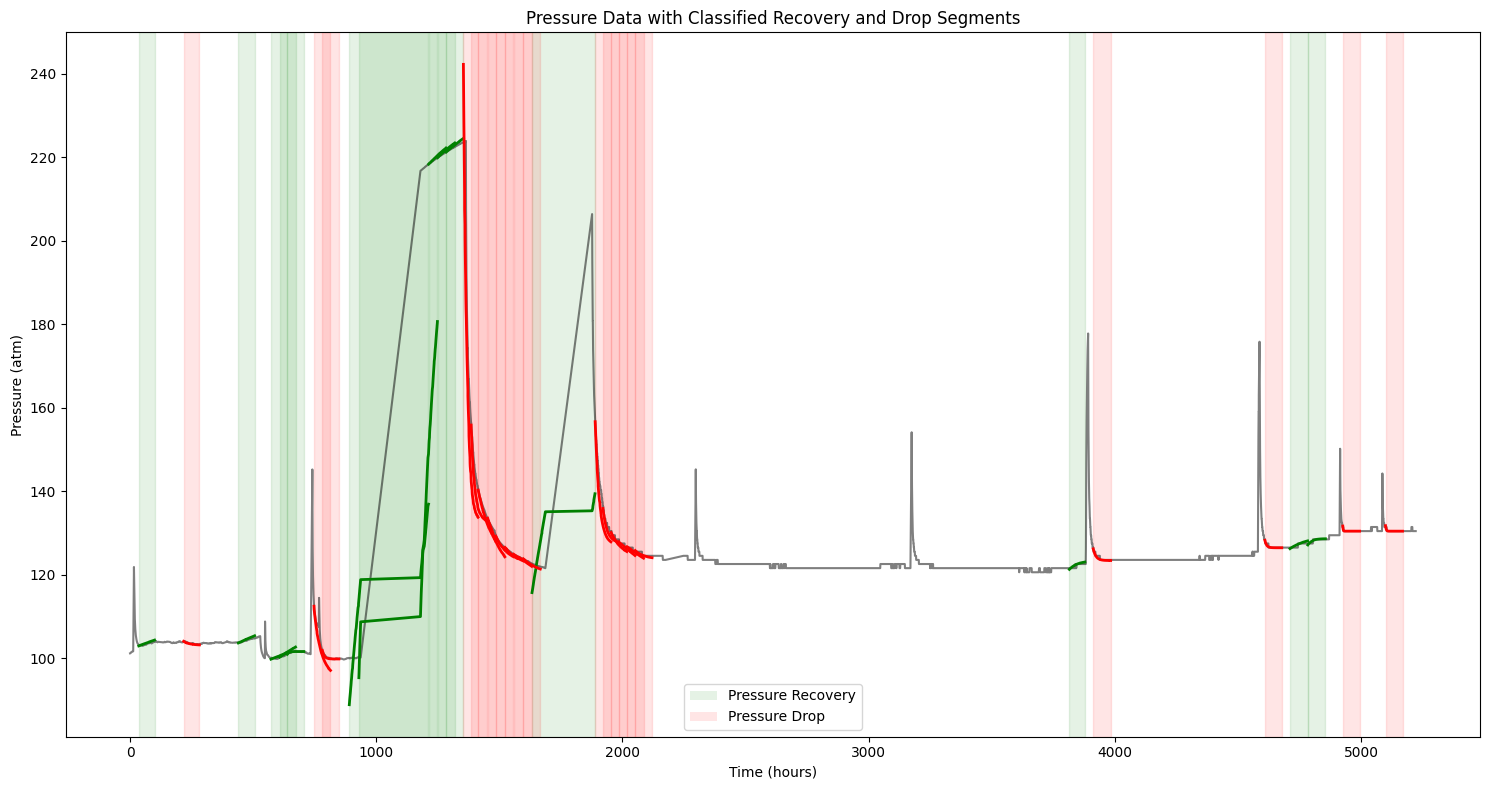

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
import warnings

def classify_pressure_curves(data, pressure_column='Давление(атм)', time_column='Время_часы', window_size=100, threshold_r2=0.8):
    """
    Classifies pressure curves into recovery (increasing) and drop (decreasing) segments

    Parameters:
    data: DataFrame containing pressure data
    pressure_column: Column name for pressure values (default: 'Давление(атм)')
    time_column: Column name for time values (default: 'Время_часы')
    window_size: Size of the window to analyze for curve fitting
    threshold_r2: R² threshold to consider a fit good

    Returns:
    Dictionary with identified segments and their classification
    """
    # Extract data
    pressure = data[pressure_column].values
    time = data[time_column].values

    # Models for fitting
    def exp_recovery_model(t, P_e, A, B):
        """Exponential recovery model: P(t) = P_e - A * exp(-B * t)"""
        return P_e - A * np.exp(-B * t)

    def exp_drop_model(t, P_s, A, B):
        """Exponential drop model: P(t) = P_s + A * exp(-B * t)"""
        return P_s + A * np.exp(-B * t)

    # Initialize result containers
    segments = {
        'recovery': [],
        'drop': []
    }

    # Analyze segments throughout the data
    for i in range(0, len(time) - window_size, window_size // 2):  # 50% overlap between windows
        t_segment = time[i:i+window_size]
        p_segment = pressure[i:i+window_size]

        # Normalize time to start from 0 for better fitting
        t_norm = t_segment - t_segment[0]

        # Check if general trend is increasing or decreasing
        trend = np.polyfit(t_norm, p_segment, 1)[0]

        try:
            if trend > 0:  # Potentially recovery
                with warnings.catch_warnings():
                    warnings.simplefilter("ignore")
                    params, _ = curve_fit(
                        exp_recovery_model,
                        t_norm,
                        p_segment,
                        p0=[p_segment[-1]*1.1, p_segment[-1]-p_segment[0], 0.1],
                        maxfev=5000,
                        bounds=([p_segment[-1]*0.9, 0, 0], [p_segment[-1]*2, np.inf, np.inf])
                    )
                p_fit = exp_recovery_model(t_norm, *params)
                r2 = r2_score(p_segment, p_fit)

                if r2 > threshold_r2:
                    segments['recovery'].append({
                        'start_idx': i,
                        'end_idx': i+window_size,
                        'start_time': time[i],
                        'end_time': time[i+window_size-1],
                        'r2': r2,
                        'params': params
                    })

            else:  # Potentially drop
                with warnings.catch_warnings():
                    warnings.simplefilter("ignore")
                    params, _ = curve_fit(
                        exp_drop_model,
                        t_norm,
                        p_segment,
                        p0=[p_segment[-1]*0.9, p_segment[0]-p_segment[-1], 0.1],
                        maxfev=5000,
                        bounds=([p_segment[-1]*0.5, 0, 0], [p_segment[-1]*1.1, np.inf, np.inf])
                    )
                p_fit = exp_drop_model(t_norm, *params)
                r2 = r2_score(p_segment, p_fit)

                if r2 > threshold_r2:
                    segments['drop'].append({
                        'start_idx': i,
                        'end_idx': i+window_size,
                        'start_time': time[i],
                        'end_time': time[i+window_size-1],
                        'r2': r2,
                        'params': params
                    })

        except (RuntimeError, ValueError):
            # Skip if curve fitting fails
            continue

    return segments

def visualize_pressure_curves(data, segments, pressure_column='Давление(атм)',time_column='Время_часы', figsize=(15, 8)):
    """
    Visualizes the identified pressure recovery and drop curves

    Parameters:
    data: DataFrame containing pressure data
    pressure_column: Column name for pressure values (default: 'Давление(атм)')
    segments: Dictionary of identified segments (output from classify_pressure_curves)
    time_column: Column name for time values (default: 'Время_часы')
    figsize: Size of the figure to display
    """
    time = data[time_column].values
    pressure = data[pressure_column].values

    plt.figure(figsize=figsize)
    plt.plot(time, pressure, 'k-', alpha=0.5, label='Pressure Data')

    # Plot recovery segments
    for seg in segments['recovery']:
        i_start, i_end = seg['start_idx'], seg['end_idx']
        t_segment = time[i_start:i_end]

        # Calculate fitted curve
        t_norm = np.array(range(len(t_segment)))
        P_e, A, B = seg['params']
        p_fit = P_e - A * np.exp(-B * t_norm)

        plt.plot(t_segment, p_fit, 'g-', linewidth=2)
        plt.axvspan(t_segment[0], t_segment[-1], color='green', alpha=0.1)

    # Plot drop segments
    for seg in segments['drop']:
        i_start, i_end = seg['start_idx'], seg['end_idx']
        t_segment = time[i_start:i_end]

        # Calculate fitted curve
        t_norm = np.array(range(len(t_segment)))
        P_s, A, B = seg['params']
        p_fit = P_s + A * np.exp(-B * t_norm)

        plt.plot(t_segment, p_fit, 'r-', linewidth=2)
        plt.axvspan(t_segment[0], t_segment[-1], color='red', alpha=0.1)

    # Add legend
    recovery_patch = plt.Rectangle((0,0), 1, 1, fc="green", alpha=0.1)
    drop_patch = plt.Rectangle((0,0), 1, 1, fc="red", alpha=0.1)
    plt.legend([recovery_patch, drop_patch], ['Pressure Recovery', 'Pressure Drop'])

    plt.title('Pressure Data with Classified Recovery and Drop Segments')
    plt.xlabel('Time (hours)')
    plt.ylabel('Pressure (atm)')
    plt.tight_layout()
    plt.show()

# Пример использования
if __name__ == "__main__":
    # Загрузка данных
    data = pd.read_csv('/content/drive/MyDrive/SIAM DATA /Task 21/Task 21/08adf5f8-b5a5-49cb-8a9e-5af37cb0bb76', sep='\t', names=['Время_часы', 'Давление(атм)'])

    # Классификация кривых
    segments = classify_pressure_curves(data, pressure_column='Давление(атм)', time_column='Время_часы')

    # Визуализация результатов
    visualize_pressure_curves(data, pressure_column='Давление(атм)', segments=segments, time_column='Время_часы')

Training model on files from folder...
Created 899971 sequences from 1215 files in /content/drive/MyDrive/SIAM DATA /Task 21/0.5task21
Adjusting output dimensions from 104 to 100


Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 100, 1)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_35 (Conv1D)                   │ (None, 100, 64)             │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_30               │ (None, 100, 64)             │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_15 (MaxPooling1D)      │ (None, 50, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_36 (Conv1D)                   │ (None, 50, 16)              │           5,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_31               │ (None, 50, 16)              │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_16 (MaxPooling1D)      │ (None, 25, 16)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_37 (Conv1D)                   │ (None, 25, 8)               │             648 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_32               │ (None, 25, 8)               │              32 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_17 (MaxPooling1D)      │ (None, 13, 8)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_38 (Conv1D)                   │ (None, 13, 8)               │             328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_33               │ (None, 13, 8)               │              32 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling1d_15 (UpSampling1D)      │ (None, 26, 8)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_39 (Conv1D)                   │ (None, 26, 16)              │             656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_34               │ (None, 26, 16)              │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling1d_16 (UpSampling1D)      │ (None, 52, 16)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_40 (Conv1D)                   │ (None, 52, 32)              │           2,592 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_35               │ (None, 52, 32)              │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 10,481 (40.94 KB)

 Trainable params: 10,193 (39.82 KB)

 Non-trainable params: 288 (1.12 KB)

Epoch 1/100
22500/22500 ━━━━━━━━━━━━━━━━━━━━ 120s 5ms/step - loss: 0.0412 - val_loss: 0.0151
Epoch 2/100
22500/22500 ━━━━━━━━━━━━━━━━━━━━ 106s 5ms/step - loss: 0.0054 - val_loss: 0.0052
Epoch 3/100
22500/22500 ━━━━━━━━━━━━━━━━━━━━ 140s 5ms/step - loss: 0.0038 - val_loss: 0.0116
Epoch 4/100
22500/22500 ━━━━━━━━━━━━━━━━━━━━ 148s 5ms/step - loss: 0.0030 - val_loss: 0.0211
Epoch 5/100
22500/22500 ━━━━━━━━━━━━━━━━━━━━ 138s 5ms/step - loss: 0.0025 - val_loss: 0.0153
Epoch 6/100
22500/22500 ━━━━━━━━━━━━━━━━━━━━ 140s 5ms/step - loss: 0.0023 - val_loss: 0.0084
Epoch 7/100
22500/22500 ━━━━━━━━━━━━━━━━━━━━ 142s 5ms/step - loss: 0.0021 - val_loss: 0.0127
Epoch 8/100
22500/22500 ━━━━━━━━━━━━━━━━━━━━ 112s 5ms/step - loss: 0.0019 - val_loss: 0.0050
Epoch 9/100
22500/22500 ━━━━━━━━━━━━━━━━━━━━ 141s 5ms/step - loss: 0.0018 - val_loss: 0.0086
Epoch 10/100
22500/22500 ━━━━━━━━━━━━━━━━━━━━ 144s 5ms/step - loss: 0.0016 - val_loss: 0.0085
Epoch 11/100
22500/22500 ━━━━━━━━━━━━━━━━━━━━ 141s 5ms/step - loss: 0

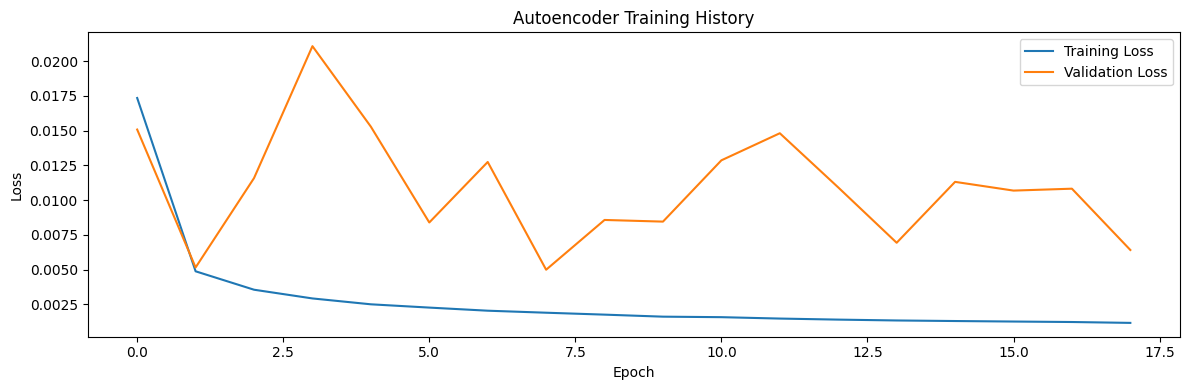


Evaluating on test file...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━

<Figure size 1500x800 with 0 Axes>

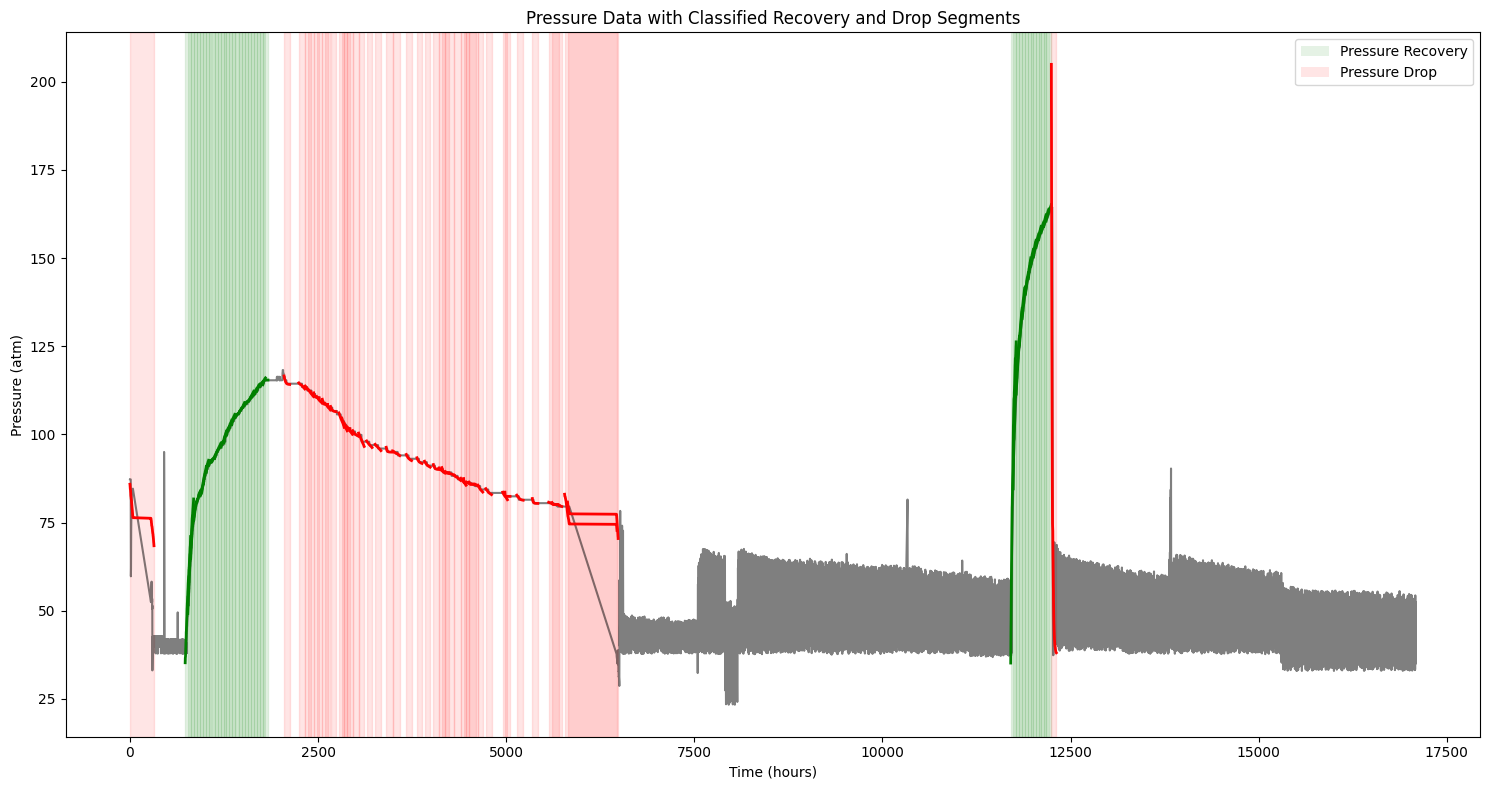

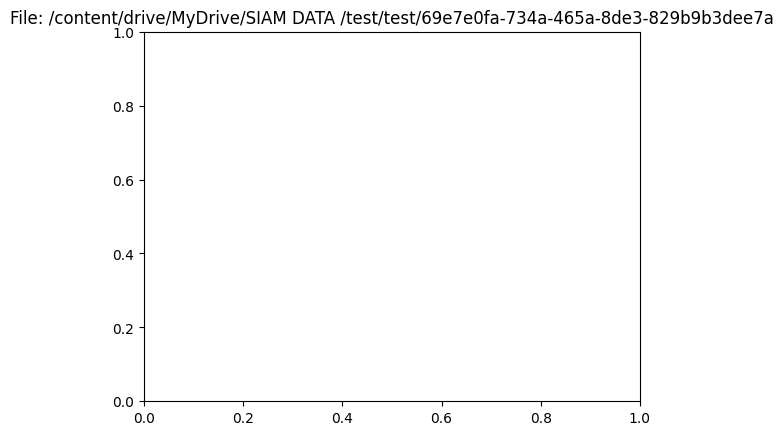

Processed test file: /content/drive/MyDrive/SIAM DATA /test/test/69e7e0fa-734a-465a-8de3-829b9b3dee7a
  Recovery segments: 41
  Drop segments: 43

--- Segment Time Stamps ---

Recovery Segments:
  Recovery #1: Start=734.10 hours, End=806.46 hours, Duration=72.36 hours, R²=0.9573
  Recovery #2: Start=769.29 hours, End=846.29 hours, Duration=77.00 hours, R²=0.9854
  Recovery #3: Start=806.95 hours, End=894.04 hours, Duration=87.09 hours, R²=0.9936
  Recovery #4: Start=847.33 hours, End=934.51 hours, Duration=87.18 hours, R²=0.9829
  Recovery #5: Start=894.63 hours, End=977.12 hours, Duration=82.49 hours, R²=0.9595
  Recovery #6: Start=935.58 hours, End=1014.11 hours, Duration=78.53 hours, R²=0.9666
  Recovery #7: Start=977.45 hours, End=1045.20 hours, Duration=67.75 hours, R²=0.9694
  Recovery #8: Start=1014.67 hours, End=1083.47 hours, Duration=68.80 hours, R²=0.9223
  Recovery #9: Start=1045.71 hours, End=1125.25 hours, Duration=79.54 hours, R²=0.8445
  Recovery #10: Start=1083.97 hour

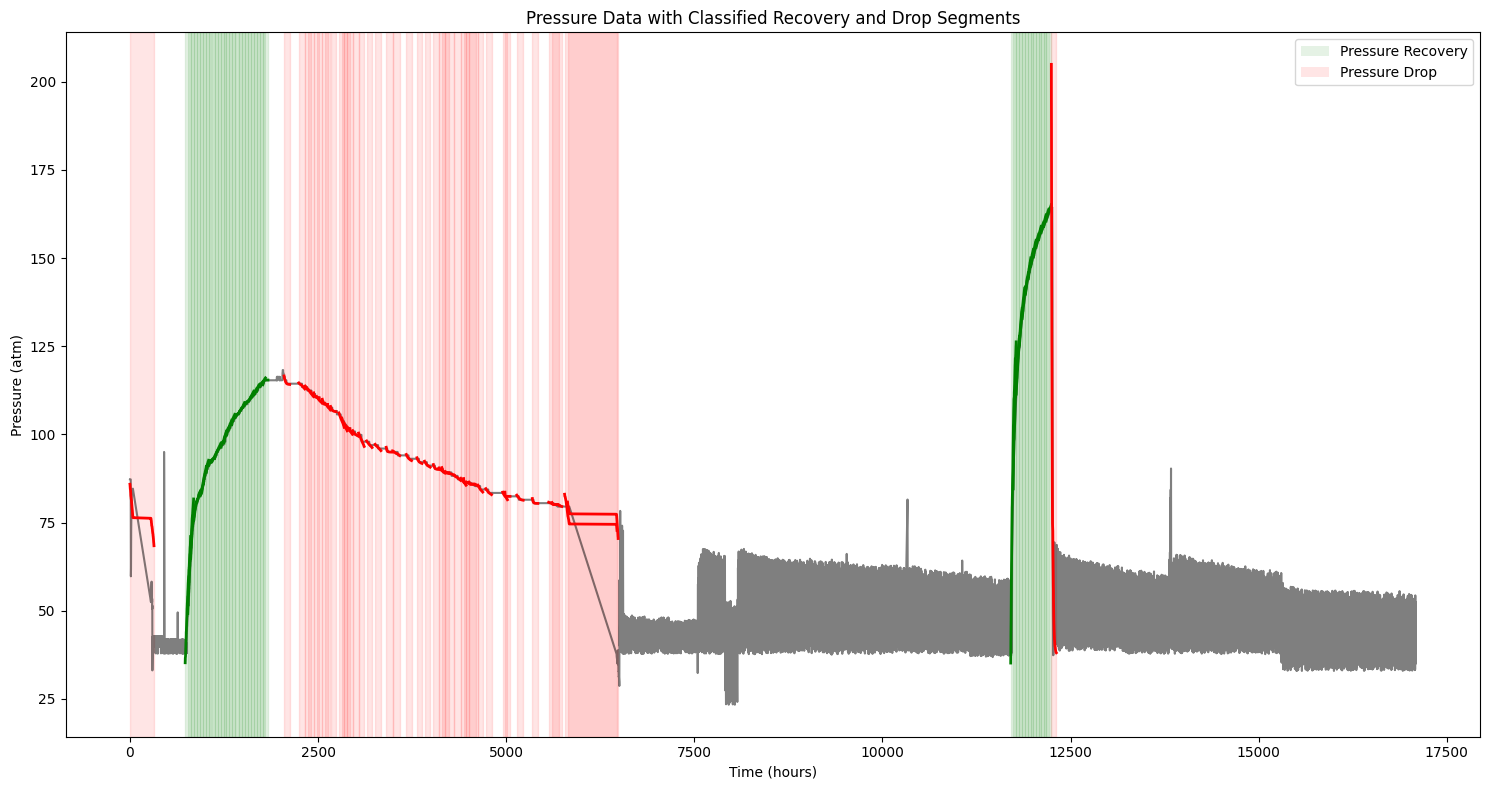


Visualization 2: Autoencoder-based Reconstruction with Color Coding
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 941ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━

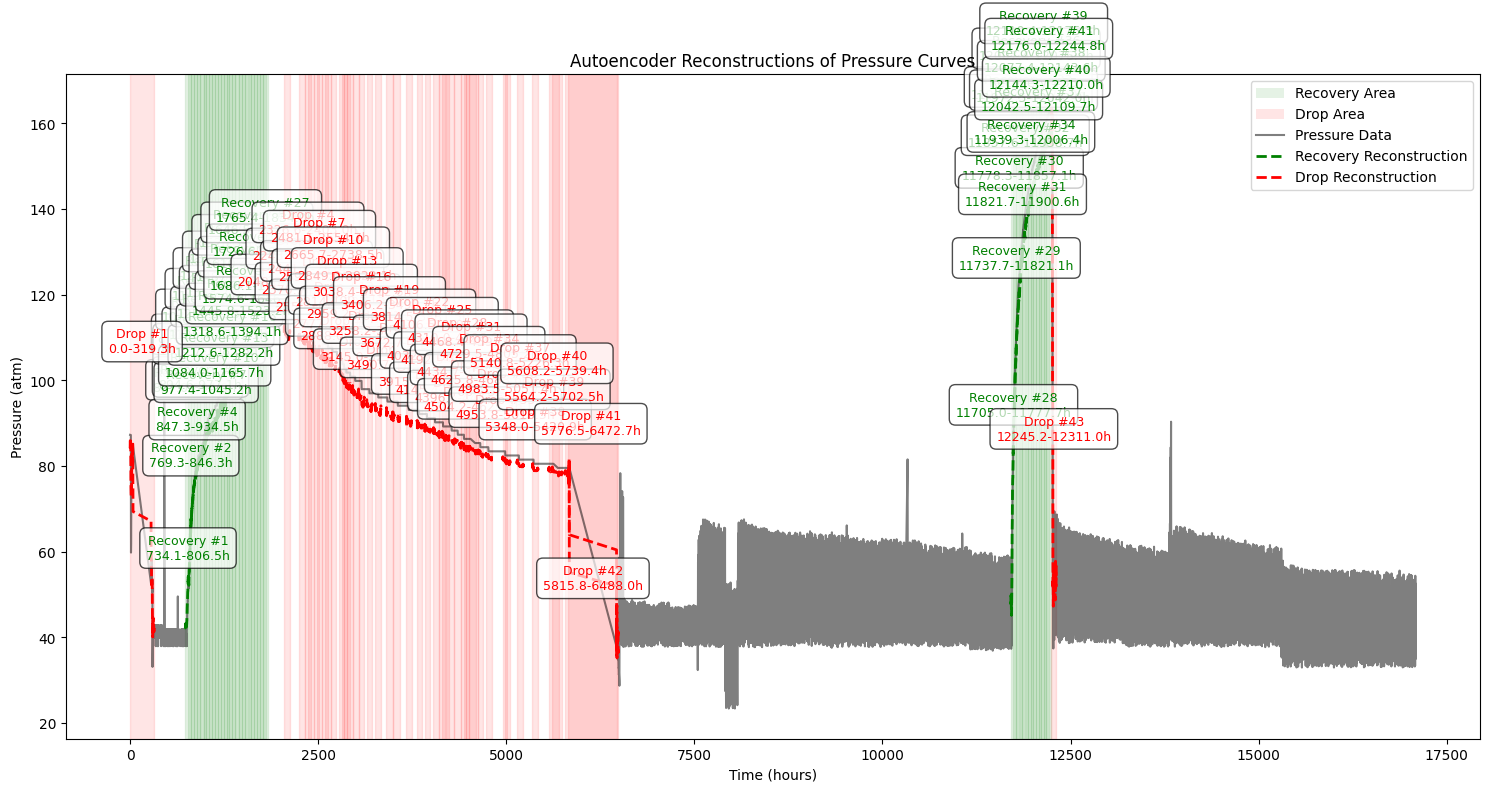

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━

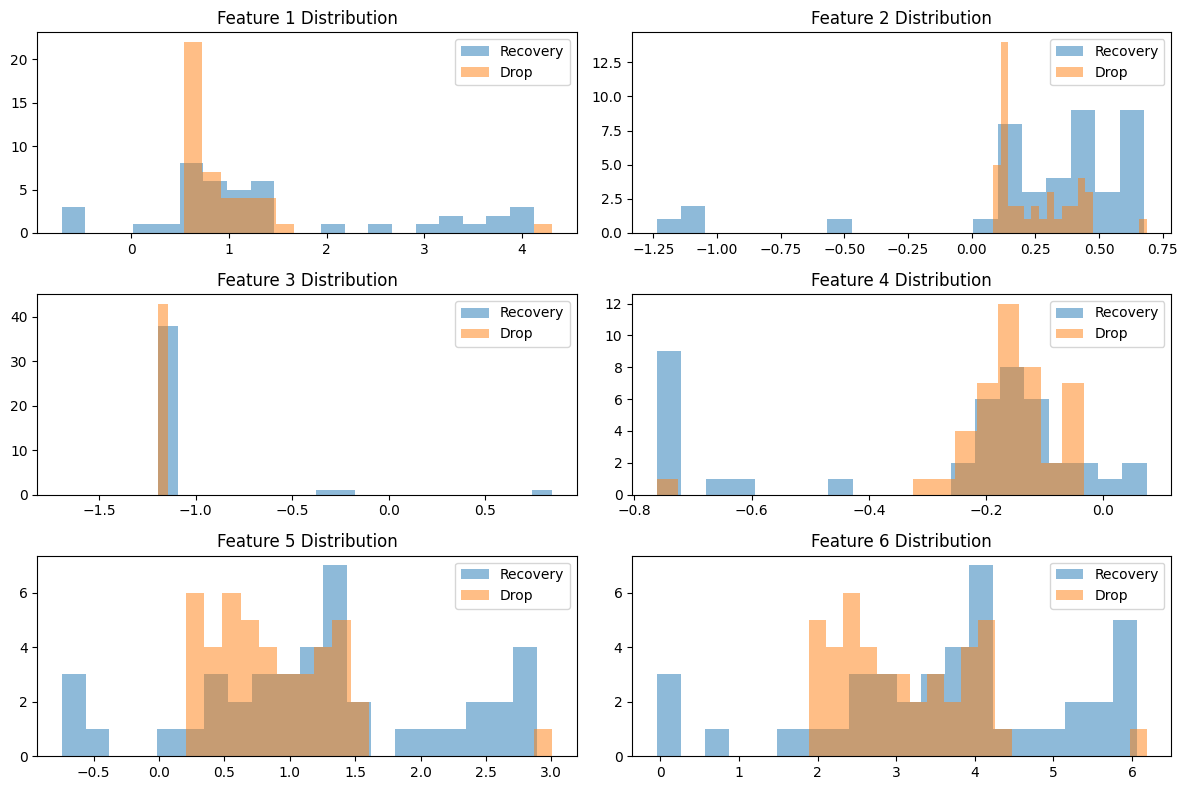


Feature Statistics:
Recovery Features:
  Feature 1: Mean=1.4560, Std=1.3143
  Feature 2: Mean=0.2612, Std=0.4528
  Feature 3: Mean=-1.1011, Std=0.3645
  Feature 4: Mean=-0.2990, Std=0.2805
  Feature 5: Mean=1.2255, Std=0.9644
  Feature 6: Mean=3.6275, Std=1.6170

Drop Features:
  Feature 1: Mean=0.9082, Std=0.5999
  Feature 2: Mean=0.2454, Std=0.1446
  Feature 3: Mean=-1.1950, Std=0.0000
  Feature 4: Mean=-0.1663, Std=0.1104
  Feature 5: Mean=0.8659, Std=0.5165
  Feature 6: Mean=3.0919, Std=0.8958


In [ ]:
# Import libraries
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, UpSampling1D, Dense, Flatten, Reshape, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import warnings
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

def classify_pressure_curves(data, pressure_column='Давление(атм)', time_column='Время_часы', window_size=100, threshold_r2=0.7):
    """
    Classifies pressure curves into recovery (increasing) and drop (decreasing) segments.
    Now includes ensemble features.
    """
    pressure = data[pressure_column].values
    time = data[time_column].values

    def exp_recovery_model(t, P_e, A, B):
        return P_e - A * np.exp(-B * t)

    def exp_drop_model(t, P_s, A, B):
        return P_s + A * np.exp(-B * t)

    segments = {'recovery': [], 'drop': []}

    for i in range(0, len(time) - window_size, window_size // 2):
        t_segment = time[i:i+window_size]
        p_segment = pressure[i:i+window_size]
        t_norm = t_segment - t_segment[0]

        trend = np.polyfit(t_norm, p_segment, 1)[0]

        try:
            if trend > 0:
                with warnings.catch_warnings():
                    warnings.simplefilter("ignore")
                    params, _ = curve_fit(exp_recovery_model, t_norm, p_segment,
                                          p0=[p_segment[-1]*1.1, p_segment[-1]-p_segment[0], 0.1],
                                          maxfev=5000, bounds=([p_segment[-1]*0.9, 0, 0], [p_segment[-1]*2, np.inf, np.inf]))
                p_fit = exp_recovery_model(t_norm, *params)
                r2 = r2_score(p_segment, p_fit)

                if r2 > threshold_r2:
                    segments['recovery'].append({
                        'start_idx': i,
                        'end_idx': i+window_size,
                        'start_time': time[i],
                        'end_time': time[i+window_size-1],
                        'r2': r2,
                        'params': params
                    })

            else:
                with warnings.catch_warnings():
                    warnings.simplefilter("ignore")
                    params, _ = curve_fit(exp_drop_model, t_norm, p_segment,
                                          p0=[p_segment[-1]*0.9, p_segment[0]-p_segment[-1], 0.1],
                                          maxfev=5000, bounds=([p_segment[-1]*0.5, 0, 0], [p_segment[-1]*1.1, np.inf, np.inf]))
                p_fit = exp_drop_model(t_norm, *params)
                r2 = r2_score(p_segment, p_fit)

                if r2 > threshold_r2:
                    segments['drop'].append({
                        'start_idx': i,
                        'end_idx': i+window_size,
                        'start_time': time[i],
                        'end_time': time[i+window_size-1],
                        'r2': r2,
                        'params': params
                    })

        except (RuntimeError, ValueError):
            continue

    return segments

def visualize_pressure_curves(data, segments, pressure_column='Давление(атм)',time_column='Время_часы', figsize=(15, 8)):
    """
    Visualizes the identified pressure recovery and drop curves

    Parameters:
    data: DataFrame containing pressure data
    pressure_column: Column name for pressure values (default: 'Давление(атм)')
    segments: Dictionary of identified segments (output from classify_pressure_curves)
    time_column: Column name for time values (default: 'Время_часы')
    figsize: Size of the figure to display
    """
    time = data[time_column].values
    pressure = data[pressure_column].values

    plt.figure(figsize=figsize)
    plt.plot(time, pressure, 'k-', alpha=0.5, label='Pressure Data')

    # Plot recovery segments
    for seg in segments['recovery']:
        i_start, i_end = seg['start_idx'], seg['end_idx']
        t_segment = time[i_start:i_end]

        # Calculate fitted curve
        t_norm = np.array(range(len(t_segment)))
        P_e, A, B = seg['params']
        p_fit = P_e - A * np.exp(-B * t_norm)

        plt.plot(t_segment, p_fit, 'g-', linewidth=2)
        plt.axvspan(t_segment[0], t_segment[-1], color='green', alpha=0.1)

    # Plot drop segments
    for seg in segments['drop']:
        i_start, i_end = seg['start_idx'], seg['end_idx']
        t_segment = time[i_start:i_end]

        # Calculate fitted curve
        t_norm = np.array(range(len(t_segment)))
        P_s, A, B = seg['params']
        p_fit = P_s + A * np.exp(-B * t_norm)

        plt.plot(t_segment, p_fit, 'r-', linewidth=2)
        plt.axvspan(t_segment[0], t_segment[-1], color='red', alpha=0.1)

    # Add legend
    recovery_patch = plt.Rectangle((0,0), 1, 1, fc="green", alpha=0.1)
    drop_patch = plt.Rectangle((0,0), 1, 1, fc="red", alpha=0.1)
    plt.legend([recovery_patch, drop_patch], ['Pressure Recovery', 'Pressure Drop'])

    plt.title('Pressure Data with Classified Recovery and Drop Segments')
    plt.xlabel('Time (hours)')
    plt.ylabel('Pressure (atm)')
    plt.tight_layout()
    plt.show()

# Add a new function to separate the visualizations
def visualize_separate_classifications(data, test_results, encoder, scaler, autoencoder, window_size=100):
    """
    Creates two separate visualizations:
    1. Original algorithm-based classification
    2. Autoencoder-based reconstruction with color coding

    Parameters:
    data: DataFrame containing pressure data
    test_results: Results from evaluate_model_on_test_data
    encoder: Trained encoder model
    scaler: Fitted scaler for normalization
    autoencoder: Trained autoencoder model
    window_size: Size of windows to analyze
    """
    segments = test_results['enhanced_segments']

    # Print segments with timestamps
    print("\n--- Segment Time Stamps ---")
    print("\nRecovery Segments:")
    for i, seg in enumerate(segments['recovery']):
        print(f"  Recovery #{i+1}: Start={seg['start_time']:.2f} hours, End={seg['end_time']:.2f} hours, Duration={(seg['end_time'] - seg['start_time']):.2f} hours, R²={seg['r2']:.4f}")

    print("\nDrop Segments:")
    for i, seg in enumerate(segments['drop']):
        print(f"  Drop #{i+1}: Start={seg['start_time']:.2f} hours, End={seg['end_time']:.2f} hours, Duration={(seg['end_time'] - seg['start_time']):.2f} hours, R²={seg['r2']:.4f}")

    # 1. First visualization: Original algorithm-based classification
    print("\nVisualization 1: Original Algorithm-based Classification")
    visualize_pressure_curves(data, segments)

    # 2. Second visualization: Autoencoder-based reconstruction
    print("\nVisualization 2: Autoencoder-based Reconstruction with Color Coding")
    visualize_autoencoder_reconstructions(data, segments, encoder, scaler, autoencoder, window_size=window_size)

def visualize_autoencoder_reconstructions(data, segments, encoder, scaler, autoencoder,
                                         pressure_column='Давление(атм)',
                                         time_column='Время_часы',
                                         window_size=100,
                                         figsize=(15, 8)):
    """
    Visualizes only the autoencoder reconstructions with color coding by segment type.

    Parameters:
    data: DataFrame containing pressure data
    segments: Dictionary of identified segments
    encoder: Trained encoder model
    autoencoder: Trained autoencoder model
    scaler: Fitted scaler for normalization
    pressure_column: Column name for pressure values
    time_column: Column name for time values
    window_size: Size of windows to analyze
    figsize: Size of the figure to display
    """
    time = data[time_column].values
    pressure = data[pressure_column].values

    plt.figure(figsize=figsize)
    plt.plot(time, pressure, 'k-', alpha=0.5, label='Pressure Data')

    # Use different colors for different segment types
    recovery_reconstructions = []
    drop_reconstructions = []

    # Add time annotations for each segment
    annotations = []

    # Process each segment
    for segment_type in ['recovery', 'drop']:
        for seg_index, seg in enumerate(segments[segment_type]):
            i_start, i_end = seg['start_idx'], seg['end_idx']

            # Get the pressure data for this segment
            p_segment = data[pressure_column].values[i_start:i_end]

            # If segment length doesn't match window size, pad or truncate
            if len(p_segment) != window_size:
                if len(p_segment) > window_size:
                    p_segment = p_segment[:window_size]
                else:
                    # Pad with last value
                    padding = np.full(window_size - len(p_segment), p_segment[-1])
                    p_segment = np.concatenate([p_segment, padding])

            # Highlight the segment area
            if segment_type == 'recovery':
                plt.axvspan(time[i_start], time[i_end-1], color='green', alpha=0.1)
                # Add annotation
                mid_point_time = (time[i_start] + time[i_end-1]) / 2
                mid_point_y = pressure[i_start + (i_end - i_start) // 2]
                annotations.append((mid_point_time, mid_point_y, f"Recovery #{seg_index+1}\n{time[i_start]:.1f}-{time[i_end-1]:.1f}h", 'green'))
            else:  # drop
                plt.axvspan(time[i_start], time[i_end-1], color='red', alpha=0.1)
                # Add annotation
                mid_point_time = (time[i_start] + time[i_end-1]) / 2
                mid_point_y = pressure[i_start + (i_end - i_start) // 2]
                annotations.append((mid_point_time, mid_point_y, f"Drop #{seg_index+1}\n{time[i_start]:.1f}-{time[i_end-1]:.1f}h", 'red'))

            # Normalize data
            p_segment_scaled = scaler.transform(p_segment.reshape(-1, 1)).reshape(-1)

            # Get autoencoder reconstruction
            p_input = p_segment_scaled.reshape(1, window_size, 1)
            reconstructed = autoencoder.predict(p_input)
            reconstructed = scaler.inverse_transform(reconstructed.reshape(-1, 1)).flatten()

            # Plot reconstructed data with appropriate color
            t_segment = time[i_start:i_start+len(reconstructed)]
            if t_segment.shape[0] > reconstructed.shape[0]:
                t_segment = t_segment[:reconstructed.shape[0]]
            elif t_segment.shape[0] < reconstructed.shape[0]:
                reconstructed = reconstructed[:t_segment.shape[0]]

            # Store for plotting with proper labels
            if segment_type == 'recovery':
                recovery_reconstructions.append((t_segment, reconstructed))
            else:  # drop
                drop_reconstructions.append((t_segment, reconstructed))

    # Plot all recovery reconstructions in green
    for i, (t_seg, recon) in enumerate(recovery_reconstructions):
        label = 'Recovery Reconstruction' if i == 0 else None
        plt.plot(t_seg, recon, 'g--', linewidth=2, label=label)

    # Plot all drop reconstructions in red
    for i, (t_seg, recon) in enumerate(drop_reconstructions):
        label = 'Drop Reconstruction' if i == 0 else None
        plt.plot(t_seg, recon, 'r--', linewidth=2, label=label)

    # Add annotations with time stamps for each segment
    y_range = max(pressure) - min(pressure)
    offset = y_range * 0.05  # 5% of the pressure range for offset

    for i, (x, y, text, color) in enumerate(annotations):
        vertical_offset = offset * ((i % 3) + 1)  # Stagger annotations to avoid overlap
        plt.annotate(text, xy=(x, y), xytext=(x, y + vertical_offset),
                    ha='center', va='bottom',
                    bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.7),
                    color=color, fontsize=9)

    # Add legend
    recovery_patch = plt.Rectangle((0,0), 1, 1, fc="green", alpha=0.1)
    drop_patch = plt.Rectangle((0,0), 1, 1, fc="red", alpha=0.1)

    # Create a custom legend
    legend_elements = [
        recovery_patch,
        drop_patch,
        plt.Line2D([0], [0], color='k', alpha=0.5),
        plt.Line2D([0], [0], color='g', linestyle='--', linewidth=2),
        plt.Line2D([0], [0], color='r', linestyle='--', linewidth=2)
    ]

    legend_labels = [
        'Recovery Area',
        'Drop Area',
        'Pressure Data',
        'Recovery Reconstruction',
        'Drop Reconstruction'
    ]

    plt.legend(legend_elements, legend_labels)
    plt.title('Autoencoder Reconstructions of Pressure Curves')
    plt.xlabel('Time (hours)')
    plt.ylabel('Pressure (atm)')
    plt.tight_layout()
    plt.show()

def filter_segments_by_length(segments, min_points=50):
    """
    Filters segments to ensure they contain at least a minimum number of points

    Parameters:
    segments: Dictionary of identified segments
    min_points: Minimum number of points required in a segment

    Returns:
    Filtered segments dictionary
    """
    filtered_segments = {
        'recovery': [],
        'drop': []
    }

    for segment_type in ['recovery', 'drop']:
        for segment in segments[segment_type]:
            if (segment['end_idx'] - segment['start_idx']) >= min_points:
                filtered_segments[segment_type].append(segment)

    return filtered_segments

def filter_segments_by_criteria(segments, data, time_column='Время_часы', min_points=50, min_hours=4):
    """
    Filters segments to ensure they meet both minimum points and duration criteria

    Parameters:
    segments: Dictionary of identified segments
    data: DataFrame containing the data
    time_column: Column name for time values
    min_points: Minimum number of points required in a segment
    min_hours: Minimum duration in hours for a segment

    Returns:
    Filtered segments dictionary
    """
    filtered_segments = {
        'recovery': [],
        'drop': []
    }

    for segment_type in ['recovery', 'drop']:
        for segment in segments[segment_type]:
            start_idx = segment['start_idx']
            end_idx = segment['end_idx']

            # Check point count
            points_count = end_idx - start_idx

            # Check duration
            start_time = segment['start_time']
            end_time = segment['end_time']
            duration_hours = end_time - start_time

            # For recovery segments, apply both criteria
            if segment_type == 'recovery':
                if points_count >= min_points and duration_hours >= min_hours:
                    filtered_segments[segment_type].append(segment)
            # For drop segments, only apply the points criteria
            else:
                if points_count >= min_points:
                    filtered_segments[segment_type].append(segment)

    return filtered_segments


def create_autoencoder_training_data_from_folder(folder_path, window_size=100, validation_split=0.2):
    """
    Creates training data for the autoencoder from multiple pressure curve files in a folder

    Parameters:
    folder_path: Path to folder containing pressure data files
    window_size: Size of windows to use for training
    validation_split: Fraction of data to use for validation

    Returns:
    X_train, X_test: Training and testing data
    scaler: Fitted scaler for normalization
    """
    all_sequences = []

    # Get all files in the folder
    files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    processed_files = 0

    for file_name in files:
        try:
            # Load data
            file_path = os.path.join(folder_path, file_name)
            data = pd.read_csv(file_path, sep='\t', names=['Время_часы', 'Давление(атм)'])

            # Extract pressure data
            pressure = data['Давление(атм)'].values

            # Create sequences
            for i in range(0, len(pressure) - window_size, window_size // 4):  # 75% overlap for more training data
                sequence = pressure[i:i+window_size]
                all_sequences.append(sequence)

            processed_files += 1
        except Exception as e:
            print(f"Error processing file {file_name}: {e}")

    print(f"Created {len(all_sequences)} sequences from {processed_files} files in {folder_path}")

    if not all_sequences:
        raise ValueError(f"No valid sequences could be extracted from files in {folder_path}")

    # Convert to numpy array and reshape for CNN
    X = np.array(all_sequences)

    # Normalize data
    scaler = StandardScaler()
    X_flat = X.reshape(-1, 1)
    X_flat_scaled = scaler.fit_transform(X_flat)
    X = X_flat_scaled.reshape(X.shape)

    # Reshape for 1D CNN: (samples, timesteps, features)
    X = X.reshape(X.shape[0], X.shape[1], 1)

    # Split into training and validation sets
    X_train, X_test = train_test_split(X, test_size=validation_split, random_state=42)

    return X_train, X_test, scaler

def build_convolutional_autoencoder(input_shape):
    """
    Build a 1D convolutional autoencoder for pressure curves with fixed output dimensions

    Parameters:
    input_shape: Shape of input data (window_size, 1)

    Returns:
    autoencoder: Complete autoencoder model
    encoder: Encoder part for feature extraction
    """
    # Get window size from input shape
    window_size = input_shape[0]

    # Encoder
    input_layer = Input(shape=input_shape)

    # First convolutional block
    x = Conv1D(64, 5, activation='relu', padding='same')(input_layer)
    x = BatchNormalization()(x)
    x = MaxPooling1D(2, padding='same')(x)

    # Second convolutional block
    x = Conv1D(16, 5, activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling1D(2, padding='same')(x)

    # Third convolutional block
    x = Conv1D(8, 5, activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    encoded = MaxPooling1D(2, padding='same')(x)

    # Calculate the shape after encoding (needed for proper upsampling)
    encoded_shape = encoded.shape[1]

    # Decoder
    x = Conv1D(8, 5, activation='relu', padding='same')(encoded)
    x = BatchNormalization()(x)
    x = UpSampling1D(2)(x)

    x = Conv1D(16, 5, activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = UpSampling1D(2)(x)

    x = Conv1D(32, 5, activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = UpSampling1D(2)(x)

    # Check if we need to adjust the dimensions
    # This is critical - the decoder might produce a different output size than the input
    # due to padding and upsampling operations
    current_shape = x.shape[1]
    if current_shape != window_size:
        print(f"Adjusting output dimensions from {current_shape} to {window_size}")
        # Use a Reshape layer if needed
        if current_shape > window_size:
            # Crop if bigger
            x = tf.keras.layers.Cropping1D((0, current_shape - window_size))(x)
        else:
            # Pad if smaller (this is unlikely with 'same' padding)
            x = tf.keras.layers.ZeroPadding1D((0, window_size - current_shape))(x)

    # Output layer - ensure it maintains the adjusted dimensions
    decoded = Conv1D(1, 5, activation='linear', padding='same')(x)

    # Create models
    autoencoder = Model(input_layer, decoded)
    encoder = Model(input_layer, encoded)

    return autoencoder, encoder


def train_autoencoder_with_curve_classification(train_folder_path, window_size=100):
    """
    Train autoencoder on pressure data from a folder and integrate with curve classification

    Parameters:
    train_folder_path: Path to folder containing training pressure data files
    window_size: Size of windows to use for training

    Returns:
    autoencoder: Trained autoencoder model
    encoder: Trained encoder part
    scaler: Fitted scaler for normalization
    """
    # Prepare data
    X_train, X_test, scaler = create_autoencoder_training_data_from_folder(train_folder_path, window_size=window_size)

    # Build the model
    input_shape = (window_size, 1)
    autoencoder, encoder = build_convolutional_autoencoder(input_shape)

    # Compile the model
    autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

    # Print model summary
    autoencoder.summary()

    # Set up callbacks for training
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    )

    # Train the model
    history = autoencoder.fit(
        X_train, X_train,
        epochs=100,
        batch_size=32,
        shuffle=True,
        validation_data=(X_test, X_test),
        callbacks=[early_stopping]
    )

    # Plot training history
    plt.figure(figsize=(12, 4))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Autoencoder Training History')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()

    return autoencoder, encoder, scaler

def enhance_curve_classification_with_autoencoder(data, segments, encoder, scaler,
                                               pressure_column='Давление(атм)', time_column='Время_часы',
                                               window_size=100):
    """
    Enhance curve classification by adding autoencoder-derived features

    Parameters:
    data: DataFrame containing pressure data
    segments: Dictionary of identified segments from classify_pressure_curves
    encoder: Trained encoder model
    scaler: Scaler used during training for normalization
    pressure_column: Column name for pressure values
    time_column: Column name for time values
    window_size: Size of windows to analyze

    Returns:
    Enhanced segments with additional features
    """
    enhanced_segments = {
        'recovery': [],
        'drop': []
    }

    # Process each segment type
    for segment_type in ['recovery', 'drop']:
        for segment in segments[segment_type]:
            i_start, i_end = segment['start_idx'], segment['end_idx']

            # Get the pressure data for this segment
            p_segment = data[pressure_column].values[i_start:i_end]

            # If segment length doesn't match window size, pad or truncate
            if len(p_segment) != window_size:
                if len(p_segment) > window_size:
                    p_segment = p_segment[:window_size]
                else:
                    # Pad with last value
                    padding = np.full(window_size - len(p_segment), p_segment[-1])
                    p_segment = np.concatenate([p_segment, padding])

            # Normalize data
            p_segment = scaler.transform(p_segment.reshape(-1, 1)).reshape(-1)

            # Extract autoencoder features
            p_input = p_segment.reshape(1, window_size, 1)
            encoded_features = encoder.predict(p_input)

            # Add features to segment info
            enhanced_segment = segment.copy()
            enhanced_segment['encoded_features'] = encoded_features.flatten()
            enhanced_segments[segment_type].append(enhanced_segment)

    return enhanced_segments

def extract_features_for_ensemble(data, segments, encoder, scaler, window_size=100):
    """
    Extracts features for ensemble model:
    - Exponential model parameters.
    - Autoencoder features.
    - Statistical features.
    """
    features = []
    labels = []

    for segment_type in ['recovery', 'drop']:
        for segment in segments[segment_type]:
            i_start, i_end = segment['start_idx'], segment['end_idx']
            p_segment = data['Давление(атм)'].values[i_start:i_end]

            # Exponential model features
            exp_features = segment.get('params', [np.nan, np.nan, np.nan])

            # Autoencoder features
            p_segment_scaled = scaler.transform(p_segment.reshape(-1, 1)).reshape(-1)
            p_input = p_segment_scaled.reshape(1, window_size, 1)
            encoded_features = encoder.predict(p_input).flatten()

            # Statistical features
            stat_features = [
                np.mean(p_segment),
                np.std(p_segment),
                np.min(p_segment),
                np.max(p_segment),
                np.max(p_segment) - np.min(p_segment)
            ]

            # Combine all features
            combined_features = np.concatenate([exp_features, encoded_features, stat_features])
            features.append(combined_features)
            labels.append(segment_type)

    return np.array(features), np.array(labels)


def train_ensemble_classifier(X, y):
    """
    Trains an ensemble classifier (Random Forest) on combined features.
    """
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Train Random Forest
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)

    # Evaluate the classifier
    y_pred = clf.predict(X_test)
    print("Ensemble Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Ensemble Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    return clf

def evaluate_model_on_test_data(test_file_path, encoder, scaler, window_size=100):
    """
    Evaluate the trained encoder on test data

    Parameters:
    test_file_path: Path to the test pressure data file
    encoder: Trained encoder model
    scaler: Fitted scaler for normalization
    window_size: Size of windows to use for evaluation

    Returns:
    Dictionary with test results
    """
    test_results = {}

    try:
        # Load data
        data = pd.read_csv(test_file_path, sep='\t', names=['Время_часы', 'Давление(атм)'])

        # Classify pressure curves using the existing algorithm
        segments = classify_pressure_curves(data, window_size=window_size)

        # Apply filtering with criteria
        filtered_segments = filter_segments_by_criteria(
            segments,
            data,
            min_points=50,
            min_hours=4
        )

        # Enhance classification with autoencoder features
        enhanced_segments = enhance_curve_classification_with_autoencoder(
            data,
            filtered_segments,
            encoder,
            scaler,
            window_size=window_size
        )

        # Store test results
        test_results = {
            'file': test_file_path,
            'segments': filtered_segments,
            'enhanced_segments': enhanced_segments
        }

        # Visualize results
        plt.figure(figsize=(15, 8))
        visualize_pressure_curves(data, enhanced_segments)
        plt.title(f'File: {test_file_path}')
        plt.show()

        print(f"Processed test file: {test_file_path}")
        print(f"  Recovery segments: {len(enhanced_segments['recovery'])}")
        print(f"  Drop segments: {len(enhanced_segments['drop'])}")

    except Exception as e:
        print(f"Error processing test file {test_file_path}: {e}")

    return test_results

def analyze_features(test_results):
    """
    Analyze the autoencoder features extracted from test data

    Parameters:
    test_results: List of test results from evaluate_model_on_test_data
    """
    all_recovery_features = []
    all_drop_features = []

    for result in test_results:
        for segment in result['enhanced_segments']['recovery']:
            if 'encoded_features' in segment:
                all_recovery_features.append(segment['encoded_features'])

        for segment in result['enhanced_segments']['drop']:
            if 'encoded_features' in segment:
                all_drop_features.append(segment['encoded_features'])

    if all_recovery_features and all_drop_features:
        all_recovery_features = np.array(all_recovery_features)
        all_drop_features = np.array(all_drop_features)

        # Visualize feature distributions
        plt.figure(figsize=(12, 8))

        feature_dim = all_recovery_features.shape[1]
        for i in range(min(6, feature_dim)):  # Show up to first 6 features
            plt.subplot(3, 2, i+1)
            if len(all_recovery_features) > 0:
                plt.hist(all_recovery_features[:, i], alpha=0.5, bins=20, label='Recovery')
            if len(all_drop_features) > 0:
                plt.hist(all_drop_features[:, i], alpha=0.5, bins=20, label='Drop')
            plt.legend()
            plt.title(f'Feature {i+1} Distribution')

        plt.tight_layout()
        plt.show()

        # Calculate feature statistics
        print("\nFeature Statistics:")
        print("Recovery Features:")
        for i in range(min(6, feature_dim)):
            print(f"  Feature {i+1}: Mean={all_recovery_features[:, i].mean():.4f}, Std={all_recovery_features[:, i].std():.4f}")

        print("\nDrop Features:")
        for i in range(min(6, feature_dim)):
            print(f"  Feature {i+1}: Mean={all_drop_features[:, i].mean():.4f}, Std={all_drop_features[:, i].std():.4f}")

# Измененный основной пайплайн
if __name__ == "__main__":
    # Set paths
    train_folder_path = "/content/drive/MyDrive/SIAM DATA /Task 21/0.5task21"  # Путь к папке с обучающими файлами
    test_file_path = "/content/drive/MyDrive/SIAM DATA /test/test/69e7e0fa-734a-465a-8de3-829b9b3dee7a"  # Путь к тестовому файлу
    window_size = 100  # Should match window_size in classify_pressure_curves

    try:
        # Train the model on multiple files from a folder
        print("Training model on files from folder...")
        autoencoder, encoder, scaler = train_autoencoder_with_curve_classification(
            train_folder_path,
            window_size=window_size
        )

        # Evaluate on a single test file
        print("\nEvaluating on test file...")
        test_results = evaluate_model_on_test_data(
            test_file_path,
            encoder,
            scaler,
            window_size=window_size
        )

        # Create separate visualizations for algorithm and autoencoder
        if 'enhanced_segments' in test_results:
            data = pd.read_csv(test_file_path, sep='\t', names=['Время_часы', 'Давление(атм)'])

            # Generate separate visualizations with timestamps
            visualize_separate_classifications(
                data,
                test_results,
                encoder,
                scaler,
                autoencoder,
                window_size=window_size
            )

            # Extract features for ensemble
            X, y = extract_features_for_ensemble(data, test_results['enhanced_segments'], encoder, scaler, window_size=window_size)

            # Train and evaluate ensemble classifier
            print("\nTraining ensemble classifier...")
            clf = train_ensemble_classifier(X, y)

            # Also analyze the features
            analyze_features([test_results])
        else:
            print("No enhanced segments available for visualization")
    except Exception as e:
        print(f"Error in main execution: {str(e)}")
        import traceback
        traceback.print_exc()

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Bidirectional, LSTM, Dense, Dropout, RepeatVector, TimeDistributed
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import warnings
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

# Suppress warnings
warnings.filterwarnings("ignore")

# ============================================
# Data Preparation
# ============================================

def create_autoencoder_training_data_from_folder(folder_path, window_size=100, validation_split=0.2):
    """
    Creates training data for the autoencoder from multiple pressure curve files in a folder.

    Parameters:
    folder_path: Path to folder containing pressure data files
    window_size: Size of windows to use for training
    validation_split: Fraction of data to use for validation

    Returns:
    X_train, X_test: Training and testing data
    scaler: Fitted scaler for normalization
    """
    all_sequences = []

    # Get all files in the folder
    files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    processed_files = 0

    for file_name in files:
        try:
            # Load data
            file_path = os.path.join(folder_path, file_name)
            data = pd.read_csv(file_path, sep='\t', names=['Время_часы', 'Давление(атм)'])

            # Extract pressure data
            pressure = data['Давление(атм)'].values

            # Create sequences with 90% overlap
            for i in range(0, len(pressure) - window_size, window_size // 10):  # 90% overlap
                sequence = pressure[i:i+window_size]
                all_sequences.append(sequence)

            processed_files += 1
        except Exception as e:
            print(f"Error processing file {file_name}: {e}")

    print(f"Created {len(all_sequences)} sequences from {processed_files} files in {folder_path}")

    if not all_sequences:
        raise ValueError(f"No valid sequences could be extracted from files in {folder_path}")

    # Convert to numpy array and reshape for LSTM
    X = np.array(all_sequences)

    # Normalize data
    scaler = StandardScaler()
    X_flat = X.reshape(-1, 1)
    X_flat_scaled = scaler.fit_transform(X_flat)
    X = X_flat_scaled.reshape(X.shape)

    # Reshape for LSTM: (samples, timesteps, features)
    X = X.reshape(X.shape[0], X.shape[1], 1)

    # Split into training and validation sets
    X_train, X_test = train_test_split(X, test_size=validation_split, random_state=42)

    return X_train, X_test, scaler

def create_sequences(data, window_size, overlap=0.9):
    """Create sequences from pressure data with 90% overlap."""
    sequences = []
    step = int(window_size * (1 - overlap))
    for i in range(0, len(data) - window_size, step):
        sequences.append(data[i:i+window_size])
    return np.array(sequences)

# ============================================
# Bidirectional LSTM Autoencoder
# ============================================

def build_bilstm_autoencoder(input_shape):
    """Builds an enhanced LSTM autoencoder with Attention and deeper layers."""
    input_layer = Input(shape=input_shape)

    encoder = Bidirectional(LSTM(256, return_sequences=True))(input_layer)
    encoder = Dropout(0.3)(encoder)
    encoder = Bidirectional(LSTM(128, return_sequences=True))(encoder)
    encoder = Dropout(0.3)(encoder)
    encoder = Bidirectional(LSTM(64, return_sequences=False))(encoder)
    encoder = Dropout(0.3)(encoder)

    repeat_vector = RepeatVector(input_shape[0])(encoder)

    decoder = Bidirectional(LSTM(64, return_sequences=True))(repeat_vector)
    decoder = Dropout(0.3)(decoder)
    decoder = Bidirectional(LSTM(128, return_sequences=True))(decoder)
    decoder = Dropout(0.3)(decoder)

    decoder = Bidirectional(LSTM(256, return_sequences=True))(decoder)
    decoder = Dropout(0.3)(decoder)
    decoder = TimeDistributed(Dense(1))(decoder)

    autoencoder = Model(input_layer, decoder)
    encoder_model = Model(input_layer, encoder)

    return autoencoder, encoder_model

# ============================================
# Enhanced Training Process
# ============================================

def train_autoencoder_with_curve_classification(train_folder_path, window_size=100):
    """
    Train autoencoder on pressure data from a folder and integrate with curve classification.
    """
    # Prepare data
    X_train, X_test, scaler = create_autoencoder_training_data_from_folder(train_folder_path, window_size=window_size)

    # Build the model
    input_shape = (window_size, 1)
    autoencoder, encoder = build_bilstm_autoencoder(input_shape)

    # Compile the model
    autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

    # Set up callbacks for training
    early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_lr=0.0001)

    # Train the model
    history = autoencoder.fit(
        X_train, X_train,
        epochs=10,  # Increased number of epochs
        batch_size=64,
        shuffle=True,
        validation_data=(X_test, X_test),
        callbacks=[early_stopping, reduce_lr],
        verbose=1
    )

    # Plot training history
    plt.figure(figsize=(12, 4))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Autoencoder Training History')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()

    return autoencoder, encoder, scaler

# ============================================
# Enhanced Curve Classification
# ============================================

def classify_pressure_curves(data, pressure_column='Давление(атм)', time_column='Время_часы', window_sizes=[50, 100, 150, 200], threshold_r2=0.7):
    """
    Classifies pressure curves into recovery (increasing) and drop (decreasing) segments using multiple window sizes.
    """
    pressure = data[pressure_column].values
    time = data[time_column].values

    def exp_recovery_model(t, P_e, A, B):
        return P_e - A * np.exp(-B * t)

    def exp_drop_model(t, P_s, A, B):
        return P_s + A * np.exp(-B * t)

    segments = {'recovery': [], 'drop': []}

    for window_size in window_sizes:
        for i in range(0, len(time) - window_size, window_size // 2):
            t_segment = time[i:i+window_size]
            p_segment = pressure[i:i+window_size]
            t_norm = t_segment - t_segment[0]

            trend = np.polyfit(t_norm, p_segment, 1)[0]

            try:
                if trend > 0:
                    with warnings.catch_warnings():
                        warnings.simplefilter("ignore")
                        params, _ = curve_fit(exp_recovery_model, t_norm, p_segment,
                                              p0=[p_segment[-1]*1.1, p_segment[-1]-p_segment[0], 0.1],
                                              maxfev=5000, bounds=([p_segment[-1]*0.9, 0, 0], [p_segment[-1]*2, np.inf, np.inf]))
                    p_fit = exp_recovery_model(t_norm, *params)
                    r2 = r2_score(p_segment, p_fit)

                    # Additional criteria for PRC
                    duration_hours = t_segment[-1] - t_segment[0]
                    relative_change = (p_segment[-1] - p_segment[0]) / p_segment[0] * 100

                    if r2 > threshold_r2 and duration_hours >= 4 and relative_change >= 5 and len(p_segment) >= 50:
                        segments['recovery'].append({
                            'start_idx': i,
                            'end_idx': i+window_size,
                            'start_time': time[i],
                            'end_time': time[i+window_size-1],
                            'r2': r2,
                            'params': params,
                            'window_size': window_size,
                            'duration_hours': duration_hours,
                            'relative_change': relative_change
                        })

                else:
                    with warnings.catch_warnings():
                        warnings.simplefilter("ignore")
                        params, _ = curve_fit(exp_drop_model, t_norm, p_segment,
                                              p0=[p_segment[-1]*0.9, p_segment[0]-p_segment[-1], 0.1],
                                              maxfev=5000, bounds=([p_segment[-1]*0.5, 0, 0], [p_segment[-1]*1.1, np.inf, np.inf]))
                    p_fit = exp_drop_model(t_norm, *params)
                    r2 = r2_score(p_segment, p_fit)

                    # Relaxed R² threshold for PDC
                    if r2 > threshold_r2 * 0.9:
                        segments['drop'].append({
                            'start_idx': i,
                            'end_idx': i+window_size,
                            'start_time': time[i],
                            'end_time': time[i+window_size-1],
                            'r2': r2,
                            'params': params,
                            'window_size': window_size,
                            'duration_hours': t_segment[-1] - t_segment[0],
                            'relative_change': (p_segment[-1] - p_segment[0]) / p_segment[0] * 100
                        })

            except (RuntimeError, ValueError):
                continue

    return segments

# ============================================
# Remove Overlapping Segments
# ============================================

def remove_overlapping_segments(segments):
    """
    Removes overlapping segments by keeping the one with the highest R² value.
    """
    filtered_segments = {'recovery': [], 'drop': []}

    for segment_type in ['recovery', 'drop']:
        segments_sorted = sorted(segments[segment_type], key=lambda x: x['r2'], reverse=True)
        used_indices = set()

        for segment in segments_sorted:
            overlap = False
            for i in range(segment['start_idx'], segment['end_idx']):
                if i in used_indices:
                    overlap = True
                    break

            if not overlap:
                filtered_segments[segment_type].append(segment)
                for i in range(segment['start_idx'], segment['end_idx']):
                    used_indices.add(i)

    return filtered_segments

# ============================================
# Save Results to submit.csv
# ============================================

def save_results_to_submit(submit_csv_path, file_name, recovery_segments, drop_segments):
    """
    Saves the results (recovery and drop segments) to submit.csv.
    """
    # Convert segments to the required format
    recovery_str = str([[seg['start_time'], seg['end_time']] for seg in recovery_segments])
    drop_str = str([[seg['start_time'], seg['end_time']] for seg in drop_segments])

    # Load the submit.csv file
    if os.path.exists(submit_csv_path):
        submit_df = pd.read_csv(submit_csv_path)
    else:
        submit_df = pd.DataFrame(columns=['file', 'recovery', 'drop'])

    # Update or add the row for the current file
    if file_name in submit_df['file'].values:
        submit_df.loc[submit_df['file'] == file_name, ['recovery', 'drop']] = [recovery_str, drop_str]
    else:
        new_row = pd.DataFrame({'file': [file_name], 'recovery': [recovery_str], 'drop': [drop_str]})
        submit_df = pd.concat([submit_df, new_row], ignore_index=True)

    # Save the updated DataFrame to submit.csv
    submit_df.to_csv(submit_csv_path, index=False)
    print(f"Results saved to {submit_csv_path}")

# ============================================
# Main Pipeline
# ============================================

if __name__ == "__main__":
    # Set paths
    train_folder_path = "/content/drive/MyDrive/SIAM DATA /0.5task21"  # Путь к папке с обучающими файлами
    test_folder_path = "/content/drive/MyDrive/SIAM DATA /test/test"  # Путь к папке с тестовыми файлами
    submit_csv_path = "/content/drive/MyDrive/SIAM DATA /submit.csv"  # Путь к submit.csv
    window_size = 100  # Should match window_size in classify_pressure_curves

    try:
        # Train the model on multiple files from a folder
        print("Training model on files from folder...")
        autoencoder, encoder, scaler = train_autoencoder_with_curve_classification(
            train_folder_path,
            window_size=window_size
        )

        # Process all test files in the folder
        test_files = [f for f in os.listdir(test_folder_path) if os.path.isfile(os.path.join(test_folder_path, f))]
        print(f"Found {len(test_files)} test files in {test_folder_path}")

        for file_name in test_files:
            try:
                print(f"Processing file: {file_name}")
                file_path = os.path.join(test_folder_path, file_name)
                data = pd.read_csv(file_path, sep='\t', names=['Время_часы', 'Давление(атм)'])

                # Classify pressure curves
                segments = classify_pressure_curves(data, window_sizes=[50, 100, 150, 200])
                filtered_segments = remove_overlapping_segments(segments)

                # Save results to submit.csv
                save_results_to_submit(submit_csv_path, file_name, filtered_segments['recovery'], filtered_segments['drop'])

            except Exception as e:
                print(f"Error processing file {file_name}: {e}")

        print("Done!")
    except Exception as e:
        print(f"Error in main execution: {str(e)}")
        import traceback
        traceback.print_exc()

Training model on files from folder...
Created 662344 sequences from 341 files in /content/drive/MyDrive/SIAM DATA /0.5task21
Epoch 1/10
4967/8280 ━━━━━━━━━━━━━━━━━━━━ 4:19:28 5s/step - loss: 0.0284

на одном файле

###СВЕРТОЧНЫЙ АВТОЭНКОДЕР

In [ ]:
import statistics
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader

os.environ["CUDA_LAUNCH_BLOCKING"] = "1"
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
class AE(nn.Module):
    def __init__(self, input_size):
        super(AE, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.LeakyReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 64),
            nn.LeakyReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, 32),
            nn.LeakyReLU(),
            nn.Dropout(0.2),
            nn.Linear(32, 2),
            nn.LeakyReLU(),
        )

        self.decoder = nn.Sequential(
            nn.Linear(2, 32),
            nn.LeakyReLU(),
            nn.Dropout(0.2),
            nn.Linear(32, 64),
            nn.LeakyReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, 128),
            nn.LeakyReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, input_size),
        )

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.encoder(x)
        x = self.decoder(x)
        x = x.view(x.size(0), -1, 1)
        return x

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/SIAM DATA /Task 21/Task 21/000281d5-f0ff-40ba-a075-780e67fdc813", sep = '\t', header=None, names=['Время(часы)', 'Давление(атм)'])

if 'Давление(атм)' in data.columns:
        pressure_new = []
        for i in range(len(data) - 1):
            x = data['Давление(атм)'][i]
            y = data['Давление(атм)'][i + 1]
            pressure_new.append(min(abs(x - y), 360 - abs(x - y)))
        pressure_new.append(statistics.median(pressure_new))
        data['Давление(атм)'] = pressure_new

In [ ]:
# Масштабируем данные с помощью StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
# [:int(0.5 * len(data))]
data_fit = data_scaled
print(len(data_fit))

12791


In [ ]:
data

,Время(часы),Давление(атм)
0,0.000000,0.000000
1,0.097222,0.164533
2,1.566944,0.000000
3,1.669722,0.164532
4,3.059167,0.000000
...,...,...
12786,17056.798056,0.067748
12787,17058.142222,0.038714
12788,17059.500556,0.019357
12789,17060.903889,0.125819


In [ ]:
    torch.manual_seed(0)
    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    param = [len(data.columns)]
    data_fit = data_fit.reshape(data_fit.shape[0], param[0], 1)
    train_data, val_data = train_test_split(data_fit, test_size=0.2, random_state=0)
    train_data = torch.tensor(train_data, dtype=torch.float32).to(device)
    val_data = torch.tensor(val_data, dtype=torch.float32).to(device)

    model = AE(param[0]).to(device)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.005)

    num_epochs = 100
    batch_size = min(1705, len(train_data))  # Ensure batch_size isn't larger than data size

    train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False)

In [ ]:
for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        for batch in train_loader:
            optimizer.zero_grad()
            outputs = model(batch)
            loss = criterion(outputs, batch)
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * batch.size(0)

        train_loss /= len(train_loader.dataset)

        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for batch in val_loader:
                outputs = model(batch)
                loss = criterion(outputs, batch)
                val_loss += loss.item() * batch.size(0)

        val_loss /= len(val_loader.dataset)
        print(f'Epoch [{epoch + 1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')

Epoch [1/100], Train Loss: 0.9322, Val Loss: 0.7814
Epoch [2/100], Train Loss: 0.5302, Val Loss: 0.3569
Epoch [3/100], Train Loss: 0.3424, Val Loss: 0.2348
Epoch [4/100], Train Loss: 0.2757, Val Loss: 0.1037
Epoch [5/100], Train Loss: 0.2510, Val Loss: 0.2537
Epoch [6/100], Train Loss: 0.2512, Val Loss: 0.3278
Epoch [7/100], Train Loss: 0.1798, Val Loss: 0.0709
Epoch [8/100], Train Loss: 0.1492, Val Loss: 0.1257
Epoch [9/100], Train Loss: 0.1957, Val Loss: 0.2480
Epoch [10/100], Train Loss: 0.2898, Val Loss: 0.1520
Epoch [11/100], Train Loss: 0.1438, Val Loss: 0.0681
Epoch [12/100], Train Loss: 0.1149, Val Loss: 0.0606
Epoch [13/100], Train Loss: 0.1241, Val Loss: 0.0734
Epoch [14/100], Train Loss: 0.1105, Val Loss: 0.1447
Epoch [15/100], Train Loss: 0.1651, Val Loss: 0.1845
Epoch [16/100], Train Loss: 0.1563, Val Loss: 0.2558
Epoch [17/100], Train Loss: 0.1564, Val Loss: 0.0496
Epoch [18/100], Train Loss: 0.1037, Val Loss: 0.0688
Epoch [19/100], Train Loss: 0.1064, Val Loss: 0.0350
Ep

In [ ]:
    print(torch.cuda.device_count())
    print(torch.cuda.is_available())

    model.eval()
    data_scaled = scaler.transform(data)
    data_pred = data_scaled.reshape(data.shape[0], param[0], 1)
    data_pred = torch.tensor(data_pred, dtype=torch.float32).to(device)

    with torch.no_grad():
        predictions = model(data_pred)

    data_prediction = predictions.cpu().numpy()
    data_residuals = data_pred.cpu().numpy() - data_prediction
    df = pd.DataFrame(data_residuals.squeeze(), columns=data.columns, index=data.index)
    corr = df.corr()

    threshold = df.quantile(0.9)

1
True


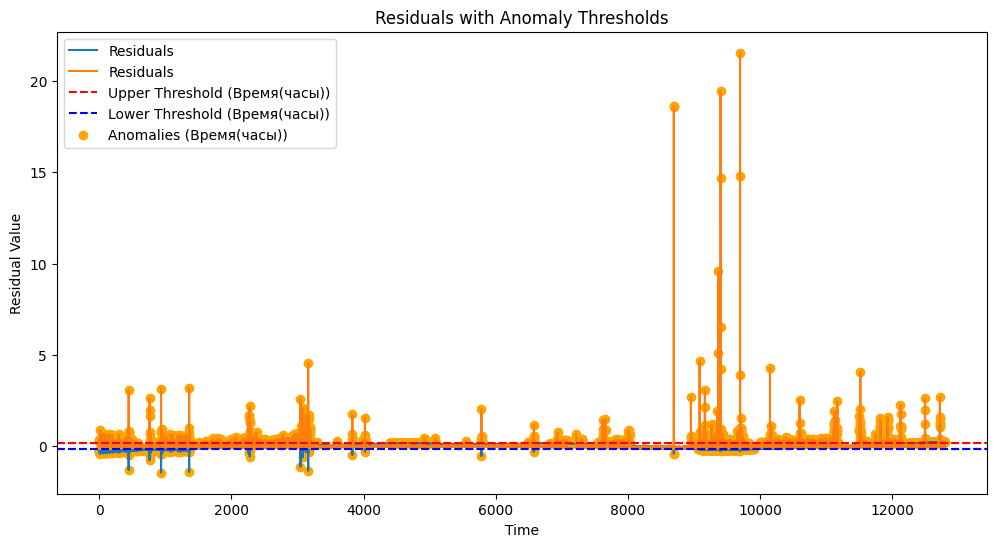

In [ ]:
    # Plotting residuals and thresholds
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df, label='Residuals')

    for column in df.columns:
        plt.axhline(threshold[column], color='red', linestyle='--', label=f'Upper Threshold ({column})' if column == df.columns[0] else "")
        plt.axhline(-threshold[column], color='blue', linestyle='--', label=f'Lower Threshold ({column})' if column == df.columns[0] else "")

    for column in df.columns:
        anomalies = df[(df[column] > threshold[column]) | (df[column] < -threshold[column])]
        plt.scatter(anomalies.index, anomalies[column], color='orange', label=f'Anomalies ({column})' if column == df.columns[0] else "")

    plt.xlabel('Time')
    plt.ylabel('Residual Value')
    plt.title('Residuals with Anomaly Thresholds')
    plt.legend()
    plt.show()


In [ ]:
    # Anomaly Dictionary
    aer_dict = {}
    for column in df.columns:
        anomalies = df[(df[column] > threshold[column]) | (df[column] < -threshold[column])].index
        aer_dict[column] = list(anomalies)
        print(f'For {column}: Total anomalies count: {len(anomalies)}')

    #check for anomaly column
    if 'anomaly' in data.columns:
        # Plotting original data with anomalies (if available)
        plt.figure(figsize=(12, 6))
        normal_points = data[data['anomaly'] == 0]
        anomaly_points = data[data['anomaly'] == -1]

        plt.scatter(normal_points.index, normal_points['Давление(атм)'], c='blue', label='Normal Points')
        plt.scatter(anomaly_points.index, anomaly_points['Давление(атм)'], c='red', label='Anomalies')

        plt.xlabel('Time')
        plt.ylabel('Pressure (atm)')
        plt.title('Anomaly Detection in Time Series')
        plt.legend()
        plt.show()

For Время(часы): Total anomalies count: 2844
For Давление(атм): Total anomalies count: 1279
